### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)
%matplotlib inline

/home/akhil/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading the data 

In [2]:
train = pd.read_csv('training_set.csv')
test = pd.read_csv('test_set.csv')

In [3]:
train.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


### Data Analysis

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

In [5]:
pd.set_option("display.float_format", "{:.2f}".format)
train.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00
mean,1954.50,0.10,0.21,0.28,0.06,0.31,0.10,0.11,0.11,0.09,0.24,0.06,0.55,0.09,0.06,0.05,0.25,0.14,0.19,1.66,0.08,0.82,0.11,0.10,0.10,0.57,0.27,0.76,0.13,0.10,0.11,0.07,0.05,0.09,0.05,0.11,0.09,0.13,0.01,0.08,0.07,0.04,0.14,0.05,0.08,0.31,0.18,0.01,0.03,0.04,0.14,0.02,0.27,0.08,0.04,5.05,52.34,283.06,0.39
std,1128.86,0.30,1.25,0.50,1.37,0.66,0.26,0.39,0.40,0.27,0.67,0.20,0.88,0.30,0.31,0.26,0.80,0.44,0.53,1.76,0.44,1.21,0.99,0.35,0.44,1.73,0.89,3.32,0.55,0.61,0.46,0.41,0.32,0.54,0.32,0.55,0.40,0.41,0.22,0.42,0.35,0.38,0.80,0.23,0.65,1.06,0.94,0.08,0.30,0.24,0.28,0.08,0.86,0.26,0.45,31.40,204.45,578.34,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,977.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.58,6.00,35.00,0.00
50%,1954.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,1.31,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,2.26,15.00,94.00,0.00
75%,2931.75,0.00,0.00,0.43,0.00,0.39,0.00,0.00,0.00,0.00,0.17,0.00,0.82,0.00,0.00,0.00,0.11,0.00,0.00,2.64,0.00,1.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.19,0.00,0.32,0.05,0.00,3.71,43.00,264.00,1.00
max,3909.00,4.34,14.28,4.54,42.81,9.09,3.57,7.27,11.11,3.23,18.18,2.61,9.67,5.55,5.55,4.41,20.00,7.14,7.69,18.75,6.32,11.11,17.10,5.45,12.50,20.83,16.66,33.33,9.09,14.28,5.88,12.50,4.76,18.18,4.76,20.00,7.69,5.05,8.33,11.11,4.76,7.14,14.28,3.57,20.00,21.42,22.05,2.17,10.00,4.38,9.75,2.78,32.48,6.00,19.83,1102.50,9989.00,10062.00,1.00


In [6]:
train.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
X30           0
X31           0
X32           0
X33           0
X34           0
X35           0
X36           0
X37           0
X38           0
X39           0
X40           0
X41           0
X42           0
X43           0
X44           0
X45           0
X46           0
X47           0
X48           0
X49           0
X50           0
X51           0
X52           0
X53           0
X54           0
X55           0
X56           0
X57           0
Y             0
dtype: int64

<AxesSubplot:>

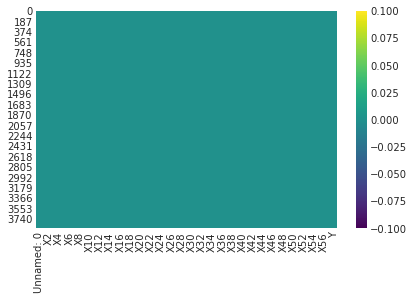

In [7]:
sns.heatmap(train.isnull(), cmap='viridis')

In [8]:
train['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

<AxesSubplot:xlabel='Y', ylabel='count'>

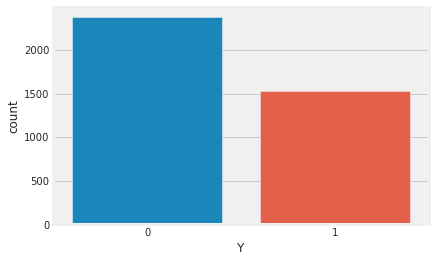

In [9]:
sns.countplot(train['Y'])

### Splitting the dataset

In [10]:
X = train.drop(['Y','Unnamed: 0'], axis=1)
y = train['Y']
X_test = test.drop('Unnamed: 0', axis=1)

### Feature Selection

* Feature Selection using SelectKBest method

In [11]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [13]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,X1,56.15
1,X2,20.87
2,X3,146.87
3,X4,365.15
4,X5,317.69
5,X6,179.08
6,X7,565.42
7,X8,276.77
8,X9,204.31
9,X10,136.05


In [14]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs     Score
56   X57 337782.33
55   X56 134374.68
54   X55   8391.55
26   X27   1902.03
24   X25   1343.22
20   X21   1080.96
15   X16    710.31
25   X26    626.39
18   X19    587.87
6     X7    565.42


* Feature Selection using ExtraTreeClassifier method

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [16]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01009931 0.00874858 0.02103579 0.00245823 0.03021655 0.01595884
 0.05817359 0.01740985 0.01776146 0.01242766 0.02178251 0.0147475
 0.00710276 0.0048176  0.00765458 0.0455631  0.02538651 0.01513947
 0.0363464  0.01803965 0.06767995 0.00528165 0.04112315 0.02855923
 0.04029665 0.01935651 0.02844834 0.00853307 0.00479654 0.0089996
 0.00491604 0.00206211 0.00559335 0.00272807 0.00549824 0.00610283
 0.01512664 0.00166875 0.00566209 0.00283457 0.00328727 0.0107997
 0.00472785 0.00505232 0.01442914 0.0171683  0.00104885 0.00307688
 0.00771233 0.01280529 0.00421099 0.04842466 0.0530894  0.00583214
 0.03357756 0.0399519  0.03866813]


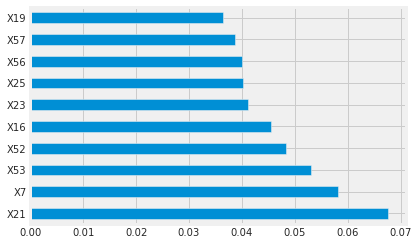

In [17]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Train Test Splitting the dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state = 42)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_val, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_val)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_val, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_val, pred)}\n\tRecall Score: {recall_score(y_val, pred)}\n\tF1 score: {f1_score(y_val, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_val, pred)}\n")

### Using Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

print_score(lr, X_train, y_train, X_test, y_val, train=True)
print_score(lr, X_train, y_train, X_test, y_val, train=False)

Train Result:
accuracy score: 0.9204

Classification Report: 
 	Precision: 0.903343023255814
	Recall Score: 0.8942446043165467
	F1 score: 0.8987707881417208

Confusion Matrix: 
 [[1996  133]
 [ 147 1243]]

Test Result:
accuracy score: 0.907928388746803

Classification Report: 
 	Precision: 0.8970588235294118
	Recall Score: 0.8472222222222222
	F1 score: 0.8714285714285713

Confusion Matrix: 
 [[233  14]
 [ 22 122]]



### Using Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_val, train=True)
print_score(tree, X_train, y_train, X_test, y_val, train=False)

Train Result:
accuracy score: 0.9991

Classification Report: 
 	Precision: 1.0
	Recall Score: 0.9978417266187051
	F1 score: 0.9989196975153044

Confusion Matrix: 
 [[2129    0]
 [   3 1387]]

Test Result:
accuracy score: 0.9156010230179028

Classification Report: 
 	Precision: 0.8827586206896552
	Recall Score: 0.8888888888888888
	F1 score: 0.8858131487889273

Confusion Matrix: 
 [[230  17]
 [ 16 128]]



### Using Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print_score(rf, X_train, y_train, X_test, y_val, train=True)
print_score(rf, X_train, y_train, X_test, y_val, train=False)

Train Result:
accuracy score: 0.9991

Classification Report: 
 	Precision: 1.0
	Recall Score: 0.9978417266187051
	F1 score: 0.9989196975153044

Confusion Matrix: 
 [[2129    0]
 [   3 1387]]

Test Result:
accuracy score: 0.9360613810741688

Classification Report: 
 	Precision: 0.9541984732824428
	Recall Score: 0.8680555555555556
	F1 score: 0.9090909090909092

Confusion Matrix: 
 [[241   6]
 [ 19 125]]



### Using XGBoost Algorithm

In [23]:
import xgboost as xgb

xg_boost = xgb.XGBClassifier(random_state=42)

xg_boost.fit(X_train, y_train)

print_score(xg_boost, X_train, y_train, X_test, y_val, train=True)
print_score(xg_boost, X_train, y_train, X_test, y_val, train=False)

Train Result:
accuracy score: 0.9989

Classification Report: 
 	Precision: 0.9985611510791367
	Recall Score: 0.9985611510791367
	F1 score: 0.9985611510791367

Confusion Matrix: 
 [[2127    2]
 [   2 1388]]

Test Result:
accuracy score: 0.9386189258312021

Classification Report: 
 	Precision: 0.9411764705882353
	Recall Score: 0.8888888888888888
	F1 score: 0.9142857142857143

Confusion Matrix: 
 [[239   8]
 [ 16 128]]



### Plotting ROC-AUC curve for all the models

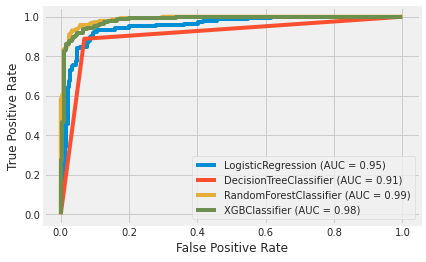

In [24]:
from sklearn.metrics import plot_roc_curve

classifiers = [lr, tree, rf, xg_boost]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_val, y_val, ax=ax)

* We can see the comparison of our machine learning models and we can conclude that **Random Forest Classifier** is performing pretty well so we can proceed further with this model